<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Charulata_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
#fetch_openml() function is a bit unusual since by default it returns the inputs as a Pandas DataFrame and the labels as a Pandas Series (unless the dataset is sparse). But the MNIST dataset contains images, and DataFrames aren’t ideal for that, so it’s preferable to set as_frame=False to get the data as NumPy arrays instead.

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Lets look a the numpy arrays:

In [5]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features.

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

y shows the labels, which is the target variable here and are digits labelled from 0 to 9.


In [8]:
28 * 28

784

This is just to confirm that each image of 784 features is made by 28*28 pixels.

Lets see first 100 images:

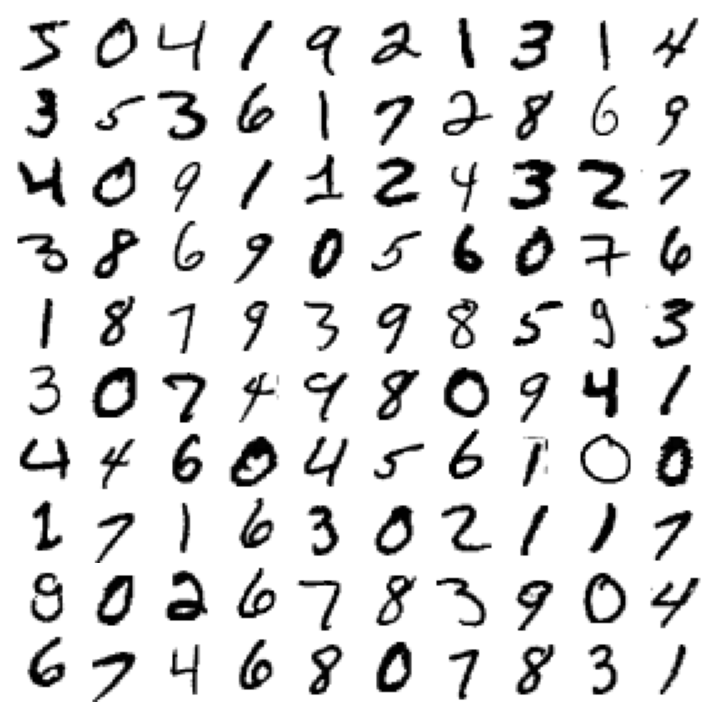

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Splitting into test and training set:

Since the dataset is big, I am splitting into 60,000 images for training and 1,000 images for testing

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:61000], y[:60000], y[60000:61000]

# Training a Binary Classifier

In [11]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

What is SGD?

SGD stands for Stochastic Gradient Descent.
It's a way to train machine learning models by making small updates to the model's parameters (like weights) one example at a time.
How does SGD work?

Instead of looking at the whole dataset at once, SGD looks at one training example at a time.
For each example, it adjusts the model a little bit to make it better at predicting.
Why is SGD good for online learning?

Online learning means the model learns and updates itself as new data comes in, rather than all at once.
Since SGD updates the model one example at a time, it can easily handle new data as it arrives.
This makes it great for situations where data is continuously coming in, like in real-time recommendation systems.

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

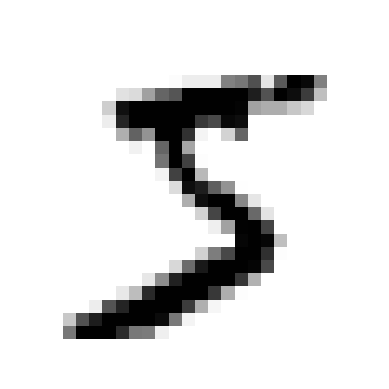

In [13]:
some_digit = X[0]

plot_digit(some_digit)
plt.show()

In [14]:
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

# METHOD 1: Measuring Accuracy Using Cross-Validation

What is Cross-Validation?

Purpose:
1. To evaluate the effectiveness of a machine learning model.

2. To ensure that the model's performance is not dependent on a particular train-test split.

**How it Works:**


**Split the Data:** The dataset is divided into several smaller sets, or "folds".
A common choice is k-fold cross-validation, where the dataset is divided into
𝑘
k folds.

**Training and Testing:**
The model is trained
𝑘
k times.
Each time, it is trained on
𝑘
−
1
k−1 folds and tested on the remaining fold.
This process is repeated so that each fold serves as the test set once.
Average the Results:

The **performance metric** (like accuracy, precision, etc.) is computed for each fold.
The final performance metric is the average of these values.

**Benefits of Cross-Validation:**

1. Better Estimation of Model Performance: By testing on multiple different subsets, it provides a more reliable estimate of how well the model will perform on unseen data.

2. Reduces Overfitting Risk: It ensures that the model's performance is not just due to memorizing a particular train-test split.

3. Utilizes Data Efficiently: All data points are used for both training and validation, which is particularly useful when the dataset is small.

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


**What is a Dummy Classifier?**

**Purpose:**

The main purpose of a dummy classifier is to serve as a baseline. It helps you understand if your more complex model is actually performing better than a very simple, naive approach.

**How It Works:**

A dummy classifier uses basic strategies to make predictions, such as:

1. Most Frequent: Always predicting the most common class in the training set.

2. Stratified: Making predictions by respecting the training set's class distribution.

3. Uniform: Making random predictions with equal probability for each class.

4. Constant: Always predicting a user-specified class.

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [18]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

**High Accuracy of a Dummy Classifier:**

1. Imbalanced Dataset:

If a dataset is imbalanced, it means that one class is much more frequent than the others.
For example, in the MNIST dataset, if only 10% of the images are the digit '5' and 90% are other digits, the dataset is imbalanced.

2. Dummy Classifier’s Strategy:

A dummy classifier often uses simple strategies like always predicting the most frequent class.
In the case of the MNIST dataset where only 10% are '5's, a dummy classifier that always predicts "not 5" will be correct 90% of the time.

3. High Accuracy:

The dummy classifier shows high accuracy (90% in this case) because it correctly predicts the majority class (not '5') most of the time.
This high accuracy is misleading because it doesn’t actually reflect the model’s ability to identify the less frequent class ('5').

# Method 2: Confusion Matrices

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [21]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

**What It Means**:

**Model Performance:**

The confusion matrix shows how well the model is performing by breaking down the predictions into four categories (TN, FP, FN, TP).
The current model has high numbers of true negatives and true positives, but also has some false positives and false negatives.

**Accuracy and Error:**

The model correctly identifies most '5's (TP) but still makes some mistakes.
There are 687 instances where the model incorrectly labeled non-'5's as '5's (FP).
There are 1891 instances where the model missed '5's and labeled them as non-'5's (FN).

**Perfect Scenario:**

In the perfect prediction example, the confusion matrix would have zeros for false positives and false negatives, indicating perfect accuracy.

# Method 3: Precision and Recall:

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_train_5 are the true labels and y_train_pred are the predicted labels
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343846


In [26]:
# Manual Calculation:
import numpy as np

# Manual Calculation
cm = np.array([[53892, 687],
               [1891, 3530]])

# Calculate precision, recall, and F1 score manually
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

precision_manual = TP / (TP + FP)
recall_manual = TP / (TP + FN)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print("Manual Precision:", precision_manual)
print("Manual Recall:", recall_manual)
print("Manual F1 Score:", f1_manual)


Manual Precision: 0.8370879772350012
Manual Recall: 0.6511713705958311
Manual F1 Score: 0.7325171197343846


**Interpretation of Results**

**Precision:**

Value: 0.8371
Meaning: Out of all instances that were predicted as '5', 83.71% were actually '5'. This indicates a relatively high precision, meaning the classifier makes relatively few false positive errors.

**Recall:**

Value: 0.6512
Meaning: Out of all actual '5's, 65.12% were correctly identified by the classifier. This shows that the classifier misses about 34.88% of the actual '5's (false negatives).

**F1 Score:**

Value: 0.7325
Meaning: The F1 score combines both precision and recall into a single metric. A score of 0.7325 indicates a balanced performance between precision and recall.

**Summary**

The model has a high precision, meaning when it predicts a '5', it's usually correct.

The recall is moderate, meaning it correctly identifies most but not all '5's.
The F1 score, which balances both precision and recall, is also moderate, suggesting that while the model is good at predicting '5's, there's room for improvement in reducing both false positives and false negatives.

Both the sklearn calculations and manual calculations match, confirming the accuracy of the metrics derived.

# Method 4: Precision/Recall Trade-off

Steps:

Training and Decision Function:

Train the model.
Get decision scores for all instances in the training set using cross-validation.

Precision-Recall Curve:

Compute precision and recall for different thresholds.
Plot precision and recall against the thresholds.

Precision vs Recall:

Plot precision against recall.

Finding the Threshold for Desired Precision:

Identify the threshold for achieving at least 90% precision.
Evaluate precision and recall at this threshold.

Prediction with threshold 0: [ True]
Prediction with threshold 3000: [False]


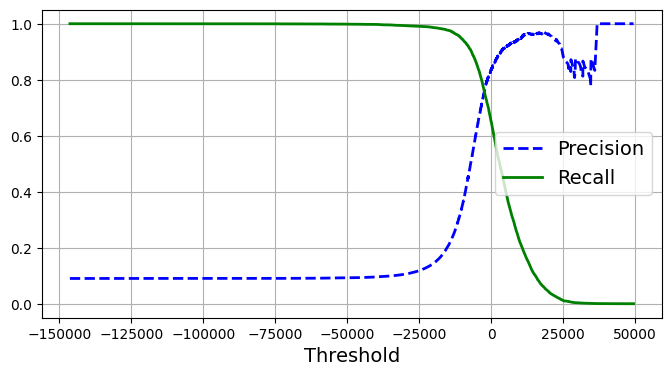

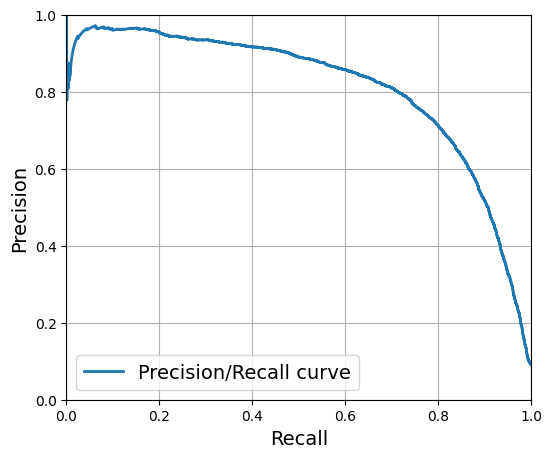

Threshold for 90% precision: 3370.0194991439557
Precision at 90% threshold: 0.9000345901072293
Recall at 90% threshold: 0.4799852425751706


In [27]:

from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

# Assuming sgd_clf is your trained SGDClassifier
# Example digit for threshold example
some_digit = X_train[0]

# Get decision scores for the example digit
y_scores = sgd_clf.decision_function([some_digit])
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(f"Prediction with threshold {threshold}: {y_some_digit_pred}")

threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(f"Prediction with threshold {threshold}: {y_some_digit_pred}")

# Get decision scores for all instances using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Compute precision and recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot precision and recall against thresholds
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.grid()
plt.show()

# Plot precision vs recall
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

# Find the threshold for 90% precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(f"Threshold for 90% precision: {threshold_for_90_precision}")

# Predictions with the new threshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_at_90 = precision_score(y_train_5, y_train_pred_90)
recall_at_90 = recall_score(y_train_5, y_train_pred_90)

print(f"Precision at 90% threshold: {precision_at_90}")
print(f"Recall at 90% threshold: {recall_at_90}")


**Training and Decision Function:**

We use sgd_clf.decision_function to get the decision scores for predictions.
We initially check the prediction for some_digit with different thresholds (0 and 3000) to demonstrate how threshold affects predictions.

**Precision-Recall Curve:**

cross_val_predict is used to get decision scores for all training instances with cross-validation.
precision_recall_curve computes precision and recall for different thresholds.
We plot precision and recall against thresholds to visualize the trade-off.

**Precision vs Recall:**

Plotting precision against recall helps us understand the trade-off between the two metrics.

**Threshold for 90% Precision:**

We find the threshold that gives at least 90% precision.

We calculate precision and recall at this threshold to evaluate model performance.

# Method 5: The ROC curve:


ROC Curve for SGD Classifier:

Compute false positive rates (FPR) and true positive rates (TPR).
Plot the ROC curve.

ROC Curve for Random Forest Classifier:

Train a Random Forest model and get predicted probabilities.
Compute ROC curve.
Compare with SGD classifier.

Precision-Recall Curve for Random Forest Classifier:

Compute precision and recall for different thresholds.
Plot precision-recall curves for both classifiers.

Key Metrics for Random Forest Classifier:

Calculate precision, recall, F1 score, and ROC AUC score for Random Forest.

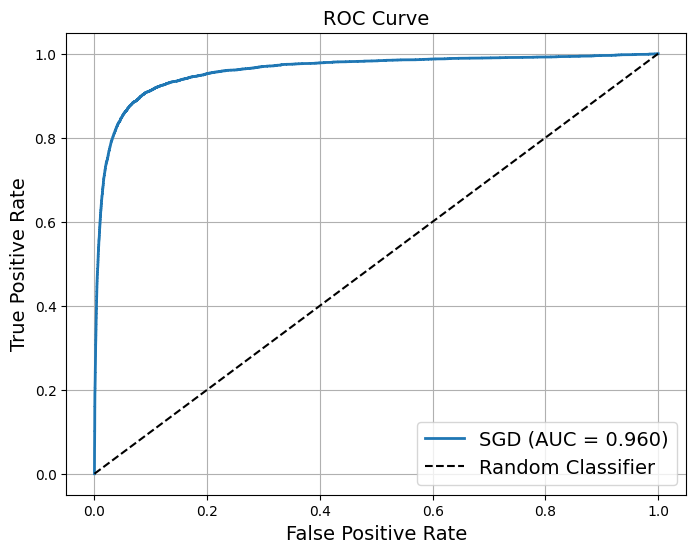

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score

# Assuming X_train and y_train_5 are already defined
sgd_clf = SGDClassifier(random_state=42)
forest_clf = RandomForestClassifier(random_state=42)

# Get decision scores for SGD
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Compute ROC curve for SGD
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scores_sgd)
roc_auc_sgd = roc_auc_score(y_train_5, y_scores_sgd)

# Plot ROC curve for SGD
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="SGD (AUC = {:.3f})".format(roc_auc_sgd))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


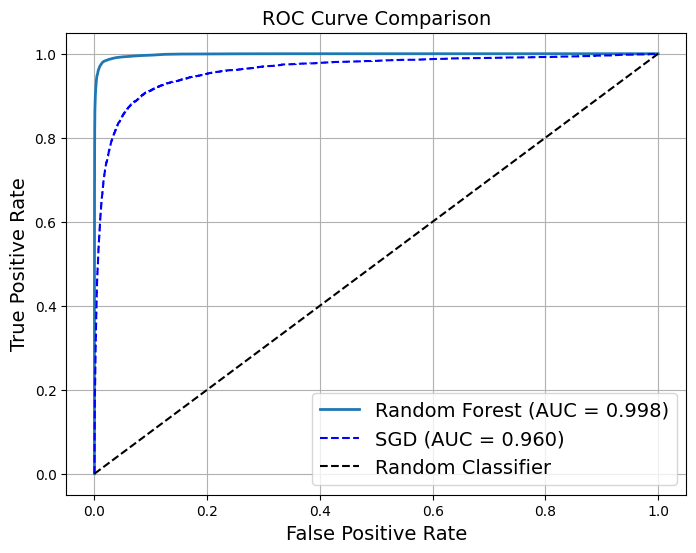

In [31]:
#Train Random Forest and get probabilities
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

# Compute ROC curve for Random Forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest (AUC = {:.3f})".format(roc_auc_forest))
plt.plot(fpr_sgd, tpr_sgd, 'b--', label="SGD (AUC = {:.3f})".format(roc_auc_sgd))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

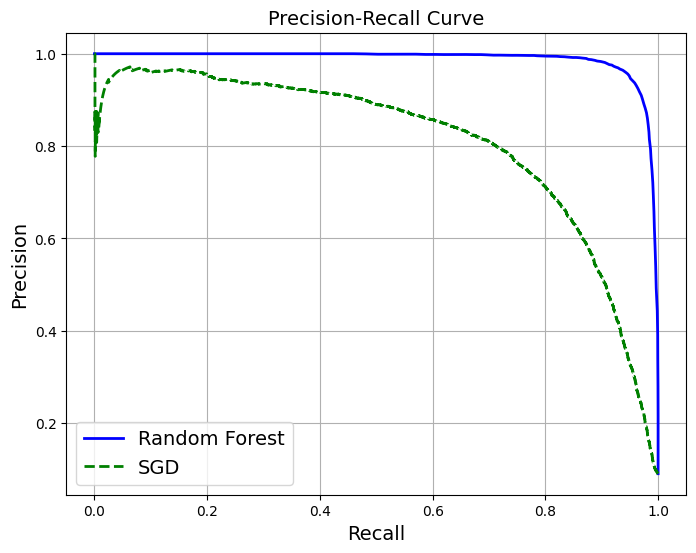

In [32]:
# Compute Precision-Recall curve for Random Forest
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_5, y_scores_sgd)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls_sgd, precisions_sgd, "g--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [33]:
# Key metrics for Random Forest
y_train_pred_forest = y_scores_forest >= 0.5  # Using 50% threshold
precision_forest = precision_score(y_train_5, y_train_pred_forest)
recall_forest = recall_score(y_train_5, y_train_pred_forest)
f1_forest = f1_score(y_train_5, y_train_pred_forest)
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)

print(f"Random Forest Precision: {precision_forest:.3f}")
print(f"Random Forest Recall: {recall_forest:.3f}")
print(f"Random Forest F1 Score: {f1_forest:.3f}")
print(f"Random Forest ROC AUC: {roc_auc_forest:.3f}")

Random Forest Precision: 0.990
Random Forest Recall: 0.873
Random Forest F1 Score: 0.927
Random Forest ROC AUC: 0.998


ROC Curve for SGD Classifier:

Computes the false positive rate (FPR) and true positive rate (TPR) for different thresholds using roc_curve.
Plots the ROC curve and calculates the area under the curve (AUC).

ROC Curve for Random Forest Classifier:

Trains a Random Forest model and gets predicted probabilities.
Computes ROC curve and AUC for Random Forest.
Plots the ROC curve and compares it with the SGD classifier.

Precision-Recall Curve for Random Forest Classifier:

Computes precision and recall for different thresholds using precision_recall_curve.
Plots precision-recall curves for both Random Forest and SGD classifiers.

Key Metrics for Random Forest Classifier:

Calculates precision, recall, F1 score, and ROC AUC score for the Random Forest classifier.
Displays these metrics to evaluate the model's performance.